In [1]:
import pandas as pd

data = pd.read_csv('data/news/preprocessed.csv')
data

type                                               text
0     FAKE                       You Can Smell Hillary’s Fear
1     FAKE  Watch The Exact Moment Paul Ryan Committed Pol...
2     REAL        Kerry to go to Paris in gesture of sympathy
3     FAKE  Bernie supporters on Twitter erupt in anger ag...
4     REAL   The Battle of New York: Why This Primary Matters
...    ...                                                ...
6294  REAL  State Department says it can't find emails fro...
6295  FAKE  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6296  FAKE  Anti-Trump Protesters Are Tools of the Oligarc...
6297  REAL  In Ethiopia, Obama seeks progress on peace, se...
6298  REAL  Jeb Bush Is Suddenly Attacking Trump. Here's W...

[6299 rows x 2 columns]

In [2]:
data.columns

Index(['type', 'text'], dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6299 entries, 0 to 6298
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    6299 non-null   object
 1   text    6299 non-null   object
dtypes: object(2)
memory usage: 98.5+ KB


In [4]:
data.isna().sum()

type    0
text    0
dtype: int64

In [5]:
# data['is_real'] = data['type'].apply(lambda x: 1 if x == 'REAL' else 0)
# data.head(5)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['type'], test_size=0.25)
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

              precision    recall  f1-score   support

        FAKE       0.83      0.75      0.79       793
        REAL       0.77      0.84      0.80       782

    accuracy                           0.80      1575
   macro avg       0.80      0.80      0.80      1575
weighted avg       0.80      0.80      0.80      1575



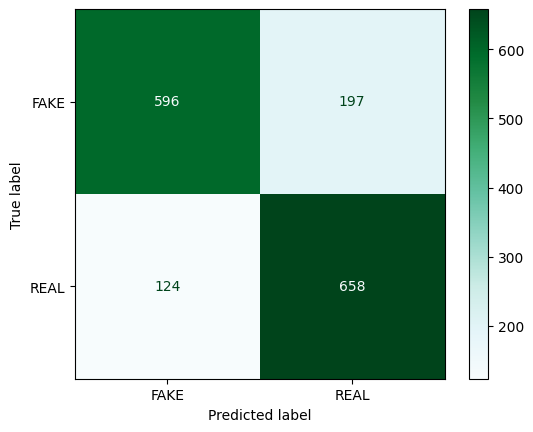

In [7]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

print(classification_report(y_test, clf.predict(X_test)))
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test, y_test,
    cmap='BuGn'
)
plt.show()